In [2]:
%matplotlib inline
# %matplotlib notebook
%config Completer.use_jedi = False
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from scipy.special import logsumexp
from scipy.special import softmax
from scipy.special import betaln
from scipy.special import beta

import numpy.linalg as linalg
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy.sparse as sparse
import random

from collections import Counter

from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

In [3]:
random_seed = 123
rng = np.random.default_rng(random_seed)

# Blobs

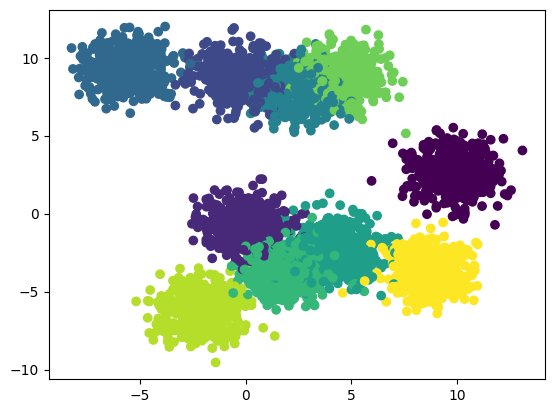

In [130]:

X, y = make_blobs(n_samples=5000, centers=10, n_features=24)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [131]:
np.savez("blobs_10_24.npz", X=X, y=y)

# Shapes

In [126]:
from skimage.draw import disk, rectangle, polygon

def generate_shape(shape, std=0.1, size=15):
    img = np.zeros((size, size), dtype=np.float32)
    center = np.round(size // 2 + np.random.uniform(0,size//10)).astype(np.int16)
    
    if shape == 'circle':
        rr, cc = disk((center, center), radius=size//3, shape=img.shape)
        img[rr, cc] = 1
    elif shape == 'square':
        s = size // 3
        rr, cc = rectangle((center-s, center-s), extent=(2*s, 2*s), shape=img.shape)
        img[rr, cc] = 1
    elif shape == 'triangle':
        s = size // 3
        points = [(center, center - s), (center - s, center + s), (center + s, center + s)]
        rr, cc = polygon([p[0] for p in points], [p[1] for p in points], shape=img.shape)
        img[rr, cc] = 1
    elif shape == 'plus':
        t = 1
        img[center - t:center + t + 1, :] = 1
        img[:, center - t:center + t + 1] = 1
    elif shape == "bar" :
        t = 1
        img[:, center - t:center + t + 1] = 1
    else:
        raise ValueError("Unknown shape")
    
    return img+  np.random.normal(0, std, size=img.shape)

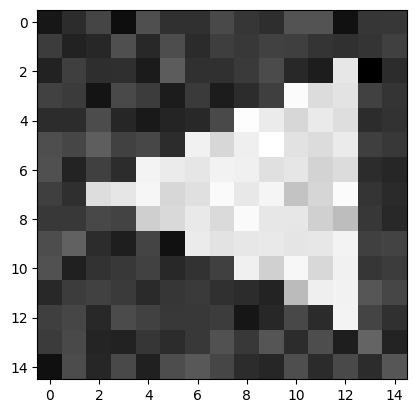

In [ ]:
plt.imshow(generate_shape('triangle',0.1, size=3), cmap="gray")

In [54]:
img = generate_shape('square')
print(img.reshape(-1))
print(img.reshape(15,15))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 

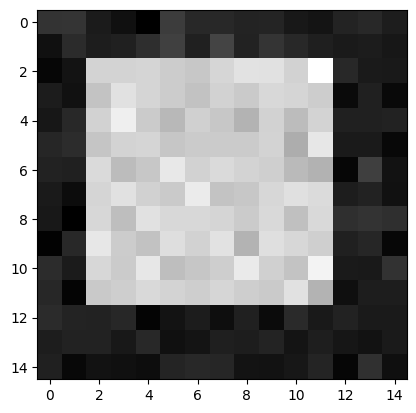

In [42]:


plt.imshow(add_noise(generate_shape('square'), 0.08), cmap="gray")